# Clickbait Classifiers - Sentiment Analisys

## Download Package

In [1]:
! pip install opendatasets

## Import Library and Datasets

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split



import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

Sumber : [dataset]('https://www.kaggle.com/datasets/amananandrai/clickbait-dataset')

In [3]:
od.download('https://www.kaggle.com/datasets/amananandrai/clickbait-dataset/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tnnz20
Your Kaggle Key: ··········


100%|██████████| 743k/743k [00:00<00:00, 35.9MB/s]

## Load Datasets

In [4]:
df = pd.read_csv('/content/clickbait-dataset/clickbait_data.csv')
print(f'Total Data : {df.shape[0]}')
df.head()

Total Data : 32000


,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1


## Check Missing Value

In [5]:
df.isna().sum()

headline     0
clickbait    0
dtype: int64

# Check Total Click Bait Distribution

In [6]:
df['clickbait'].value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

## Show random text

In [7]:
random = np.random.randint(100)

df['headline'][random]

"There's An Amazing New Beauty Box Catering To Women Of Color"

## Convert headline text into lower case

In [8]:
df['headline'] = df['headline'].str.lower()

## Remove stopwords using nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stop = set(stopwords.words('english'))
df['new_headline'] = df['headline'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df.head(10)

,headline,clickbait,new_headline
0,should i get bings,1,get bings
1,which tv female friend group do you belong in,1,tv female friend group belong
2,"the new ""star wars: the force awakens"" trailer...",1,"new ""star wars: force awakens"" trailer give ch..."
3,"this vine of new york on ""celebrity big brothe...",1,"vine new york ""celebrity big brother"" fucking ..."
4,a couple did a stunning photo shoot with their...,1,couple stunning photo shoot baby learning inop...
5,how to flirt with queer girls without making a...,1,flirt queer girls without making total fool
6,32 cute things to distract from your awkward t...,1,32 cute things distract awkward thanksgiving
7,if disney princesses were from florida,1,disney princesses florida
8,what's a quote or lyric that best describes yo...,1,what's quote lyric best describes depression
9,natalie dormer and sam claflin play a game to ...,1,natalie dormer sam claflin play game see they'...


## Stemming headline with Snowball Stemmer nltk

In [11]:
def stemming(sentences):
    snowball = SnowballStemmer(language='english')
    
    return snowball.stem(sentences)

In [12]:
df['new_headline'] = df['new_headline'].apply(stemming)
df.head(10)

,headline,clickbait,new_headline
0,should i get bings,1,get b
1,which tv female friend group do you belong in,1,tv female friend group belong
2,"the new ""star wars: the force awakens"" trailer...",1,"new ""star wars: force awakens"" trailer give chil"
3,"this vine of new york on ""celebrity big brothe...",1,"vine new york ""celebrity big brother"" fucking ..."
4,a couple did a stunning photo shoot with their...,1,couple stunning photo shoot baby learning inop...
5,how to flirt with queer girls without making a...,1,flirt queer girls without making total fool
6,32 cute things to distract from your awkward t...,1,32 cute things distract awkward thanksgiv
7,if disney princesses were from florida,1,disney princesses florida
8,what's a quote or lyric that best describes yo...,1,what's quote lyric best describes depress
9,natalie dormer and sam claflin play a game to ...,1,natalie dormer sam claflin play game see they'...


## Separate out the sentences and labels into training and test sets

In [13]:
sentences = df['new_headline']
label = df['clickbait']

training_sentences, testing_sentences, training_label, testing_label = train_test_split(sentences, label, test_size=0.2, random_state=42)

print(f'Total data training : {len(training_sentences)}')
print(f'Total data testing : {len(testing_sentences)}')

Total data training : 25600
Total data testing : 6400


## Tokenize Data

In [14]:
vocab_size = 5000
maxlen = 100
embedding_dim = 32
filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}'
oov_token = "<OOV>"

# Tokenize text (padding dan sequences)
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token, filters = filters)
tokenizer.fit_on_texts(training_sentences)

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=maxlen)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=maxlen)

In [18]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [20]:
num_epochs = 100
history = model.fit(training_padded, training_label, epochs=num_epochs, batch_size=512, 
                    validation_data=(testing_padded, testing_label), callbacks=[model_checkpoint,early_stopping])

Epoch 1/100
50/50 [==============================] - 7s 73ms/step - loss: 0.5892 - accuracy: 0.7326 - val_loss: 0.4204 - val_accuracy: 0.8902
Epoch 2/100
50/50 [==============================] - 2s 39ms/step - loss: 0.2456 - accuracy: 0.9391 - val_loss: 0.1535 - val_accuracy: 0.9480
Epoch 3/100
50/50 [==============================] - 2s 43ms/step - loss: 0.0969 - accuracy: 0.9664 - val_loss: 0.1175 - val_accuracy: 0.9580
Epoch 4/100
50/50 [==============================] - 2s 40ms/step - loss: 0.0680 - accuracy: 0.9761 - val_loss: 0.1203 - val_accuracy: 0.9575
Epoch 5/100
50/50 [==============================] - 2s 34ms/step - loss: 0.0543 - accuracy: 0.9812 - val_loss: 0.1244 - val_accuracy: 0.9559
Epoch 6/100
50/50 [==============================] - 2s 35ms/step - loss: 0.0458 - accuracy: 0.9842 - val_loss: 0.1328 - val_accuracy: 0.9561
Epoch 7/100
50/50 [==============================] - 2s 36ms/step - loss: 0.0380 - accuracy: 0.9866 - val_loss: 0.1440 - val_accuracy: 0.9544
Epoch 

## Plot Accuracy and Loss 

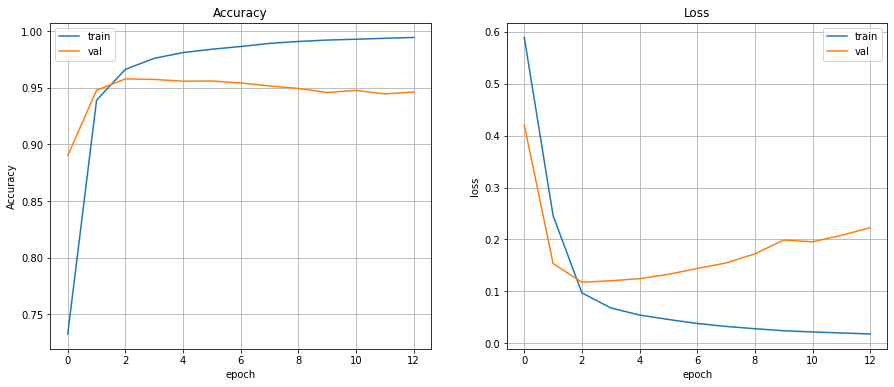

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.grid()
plt.show()

## Load Model

In [23]:
load_model = tf.keras.models.load_model('my_checkpoint.h5')

## Predict Model

In [24]:
test = ['My biggest laugh reveal ever!', 
        'Learning game development with Unity', 
        'A tour of Japan\'s Kansai region', 
        '12 things NOT to do in Europe']

token_text = pad_sequences(tokenizer.texts_to_sequences(test), maxlen=maxlen)

preds = [round(i[0]) for i in load_model.predict(token_text)]
for (text, pred) in zip(test, preds):
    label = 'Clickbait' if pred == 1.0 else 'Not Clickbait'
    print("{} - {}".format(text, label))

My biggest laugh reveal ever! - Clickbait
Learning game development with Unity - Clickbait
A tour of Japan's Kansai region - Not Clickbait
12 things NOT to do in Europe - Clickbait


In [25]:
from google.colab import files
files.download('my_checkpoint.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>